# ⚡ CHALLENGE TELECOM X_PARTE 2

In [3]:
import pandas as pd
data=pd.read_csv('datos_tratados.csv')
data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas.Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,65.60
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.90,542.40,59.90
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.90,280.85,73.90
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.00,1237.85,98.00
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.90,267.40,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,55.15
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month to month,Yes,Electronic check,85.10,1873.70,85.10
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month to month,Yes,Mailed check,50.30,92.75,50.30
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,67.85


## ✅ Encoding
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [4]:
# Seleccionamos las columnas categóricas
col_categorica = data.select_dtypes(include=['object']).columns.tolist()

# Excluimos 'customerID'
col_categorica.remove('customerID')

# Aplicamos one-hot encoding
codificacion_dato = pd.get_dummies(data, columns=col_categorica, drop_first=True)

# Mostramos el resultado
display(codificacion_dato.head())

,customerID,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas.Diarias,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,65.6,False,False,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0003-MKNFE,0,9,59.9,542.40,59.9,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,0,4,73.9,280.85,73.9,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0011-IGKFF,1,13,98.0,1237.85,98.0,True,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4,0013-EXCHZ,1,3,83.9,267.40,83.9,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


### Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [5]:
# Calculamos el conteo de valores para la columna 'Churn_Yes'
churn_conteo = codificacion_dato['Churn_Yes'].value_counts()

# Calculamos la proporción de clientes que cancelaron
churn_proporcion = churn_conteo[True] / len(codificacion_dato)

# Relizamos la muestra de los conteos y la proporción
print("Conteo de clientes por estado de cancelación:")
print(churn_conteo)
print(f"\nProporción de clientes que cancelaron (Churn): {churn_proporcion:.2f}")

# Evaluamos si existe un desbalance de clases
if churn_proporcion < 0.3 or churn_proporcion > 0.7:
    print("\nAdvertencia: Existe un desbalance significativo en las clases.")
else:
    print("\nNo hay un desbalance significativo en las clases.")

Conteo de clientes por estado de cancelación:
Churn_Yes
False    5398
True     1869
Name: count, dtype: int64

Proporción de clientes que cancelaron (Churn): 0.26

Advertencia: Existe un desbalance significativo en las clases.


### ⚖ Balanceo de Clases (opcional)
Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [6]:
#Instalamos librería para aplicar SMOTE y balancear
!pip install imbalanced-learn

Una vez instalada la librería, podemos aplicar SMOTE. Primero, separaremos las características y la variable objetivo.
(En este caso salió error por que habían valores nan y pasamos a corregir mas abajo)

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separamos características (X) y variable objetivo (y)
# Eliminamos 'customerID' ya que no es una característica para el modelo
X = codificacion_dato.drop(['Churn_Yes', 'customerID'], axis=1)
y = codificacion_dato['Churn_Yes']

# Aplicar SMOTE para balancear la clase minoritaria (clientes que cancelaron)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verificar el balanceo de clases después de aplicar SMOTE
print("Conteo de clientes por estado de cancelación después de SMOTE:")
print(y_res.value_counts())

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
# Verificamos si hay valores faltantes en el DataFrame X
valores_faltantes = X.isnull().sum()

# Filtramos las columnas que tienen valores faltantes
columnas_con_nan = valores_faltantes[valores_faltantes > 0]

# Mostramos el conteo de valores faltantes por columna
print("Conteo de valores faltantes por columna:")
print(columnas_con_nan)

# Mostramos el total de valores faltantes en todo el DataFrame X
total_nan = columnas_con_nan.sum()
print(f"\nTotal de valores faltantes en X: {total_nan}")

# Mostramos la proporción de valores faltantes si existen
if total_nan > 0:
    proporcion_nan = total_nan / X.size
    print(f"Proporción total de valores faltantes en X: {proporcion_nan:.4f}")

Conteo de valores faltantes por columna:
Charges.Total    11
dtype: int64

Total de valores faltantes en X: 11
Proporción total de valores faltantes en X: 0.0001


Primero, eliminaremos las filas con valores faltantes en el conjunto de datos.

In [9]:
# Eliminamos filas con valores faltantes en X y y
X_cleaned = X.dropna()
y_cleaned = y[X_cleaned.index] # Aseguramos que y_cleaned corresponda a las filas restantes en X_cleaned

print(f"Número de filas originales: {len(X)}")
print(f"Número de filas después de eliminar faltantes: {len(X_cleaned)}")

Número de filas originales: 7267
Número de filas después de eliminar faltantes: 7256


Ahora que hemos eliminado los valores faltantes, aplicaremos SMOTE para balancear las clases.

In [10]:
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE para balancear la clase minoritaria (clientes que cancelaron)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_cleaned, y_cleaned)

# Verificamos el balanceo de clases después de aplicar SMOTE
print("Conteo de clientes por estado de cancelación después de SMOTE:")
print(y_res.value_counts())

Conteo de clientes por estado de cancelación después de SMOTE:
Churn_Yes
False    5387
True     5387
Name: count, dtype: int64


### ❗ Normalización o Estandarización (si es necesario)
Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

#### 1. Dividir los datos
Dividiremos el conjunto de datos balanceado (`X_res`, `y_res`) en conjuntos de entrenamiento y prueba.

In [11]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño de las etiquetas de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño de las etiquetas de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (8619, 30)
Tamaño del conjunto de prueba (X_test): (2155, 30)
Tamaño de las etiquetas de entrenamiento (y_train): (8619,)
Tamaño de las etiquetas de prueba (y_test): (2155,)


#### 2. Escalamos los datos (para Regresión Logística)
Aplicaremos `StandardScaler` a las características de entrenamiento y prueba. Este paso es necesario para modelos basados en distancia como la Regresión Logística.

In [12]:
from sklearn.preprocessing import StandardScaler

# Inicializamos el escalador
scaler = StandardScaler()

# Ajustamos el escalador solo con los datos de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDatos de entrenamiento escalados (primeras 5 filas):")
display(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

print("\nDatos de prueba escalados (primeras 5 filas):")
display(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())


Datos de entrenamiento escalados (primeras 5 filas):


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas.Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2.504679,1.066633,0.535519,1.057823,0.535519,-1.169276,0.996872,-0.647843,0.298698,1.037481,...,-0.44712,1.118209,-0.44712,1.110361,2.053610,-0.459580,0.661406,-0.528359,1.027409,-0.556667
1,-0.399253,-0.357647,0.739173,-0.163447,0.739173,-1.169276,0.996872,1.543584,0.298698,1.037481,...,-0.44712,-0.894287,-0.44712,1.110361,2.053610,-0.459580,0.661406,-0.528359,-0.973322,-0.556667
2,2.504679,0.145040,0.528411,0.207735,0.528411,0.855230,-1.003138,-0.647843,0.298698,1.037481,...,-0.44712,1.118209,-0.44712,1.110361,2.053610,-0.459580,0.661406,1.892653,1.027409,-0.556667
3,-0.399253,0.228821,1.238156,0.651882,1.238156,-1.169276,0.996872,1.543584,0.298698,1.037481,...,-0.44712,1.118209,-0.44712,1.110361,2.053610,-0.459580,0.661406,-0.528359,-0.973322,1.796405
4,-0.399253,1.694991,0.760036,1.800253,0.760036,-1.169276,0.996872,-0.647843,0.298698,1.037481,...,-0.44712,1.118209,-0.44712,-0.900608,-0.486947,2.175898,0.661406,-0.528359,-0.973322,-0.556667



Datos de prueba escalados (primeras 5 filas):


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas.Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2.504679,1.150414,1.109498,1.587278,1.109498,-1.169276,-1.003138,-0.647843,0.298698,1.037481,...,-0.44712,1.118209,-0.44712,1.110361,2.053610,-0.459580,0.661406,-0.528359,1.027409,-0.556667
1,2.504679,-1.111678,-0.862094,-0.916211,-0.862094,0.855230,-1.003138,-0.647843,-3.347867,-0.963873,...,-0.44712,-0.894287,-0.44712,1.110361,-0.486947,-0.459580,0.661406,-0.528359,1.027409,-0.556667
2,-0.399253,0.019368,-0.284873,-0.178172,-0.284873,-1.169276,-1.003138,-0.647843,0.298698,-0.963873,...,-0.44712,-0.894287,-0.44712,-0.900608,2.053610,-0.459580,0.661406,-0.528359,1.027409,-0.556667
3,2.504679,-0.986006,0.733957,-0.777480,0.733957,-1.169276,-1.003138,-0.647843,0.298698,1.037481,...,-0.44712,1.118209,-0.44712,-0.900608,-0.486947,-0.459580,0.661406,-0.528359,1.027409,-0.556667
4,-0.399253,1.862554,1.321610,2.521300,1.321610,0.855230,0.996872,1.543584,0.298698,1.037481,...,-0.44712,1.118209,-0.44712,-0.900608,-0.486947,2.175898,0.661406,1.892653,-0.973322,-0.556667


## 🎯 Correlación y Selección de Variables

### 〽 Análisis de Correlación
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

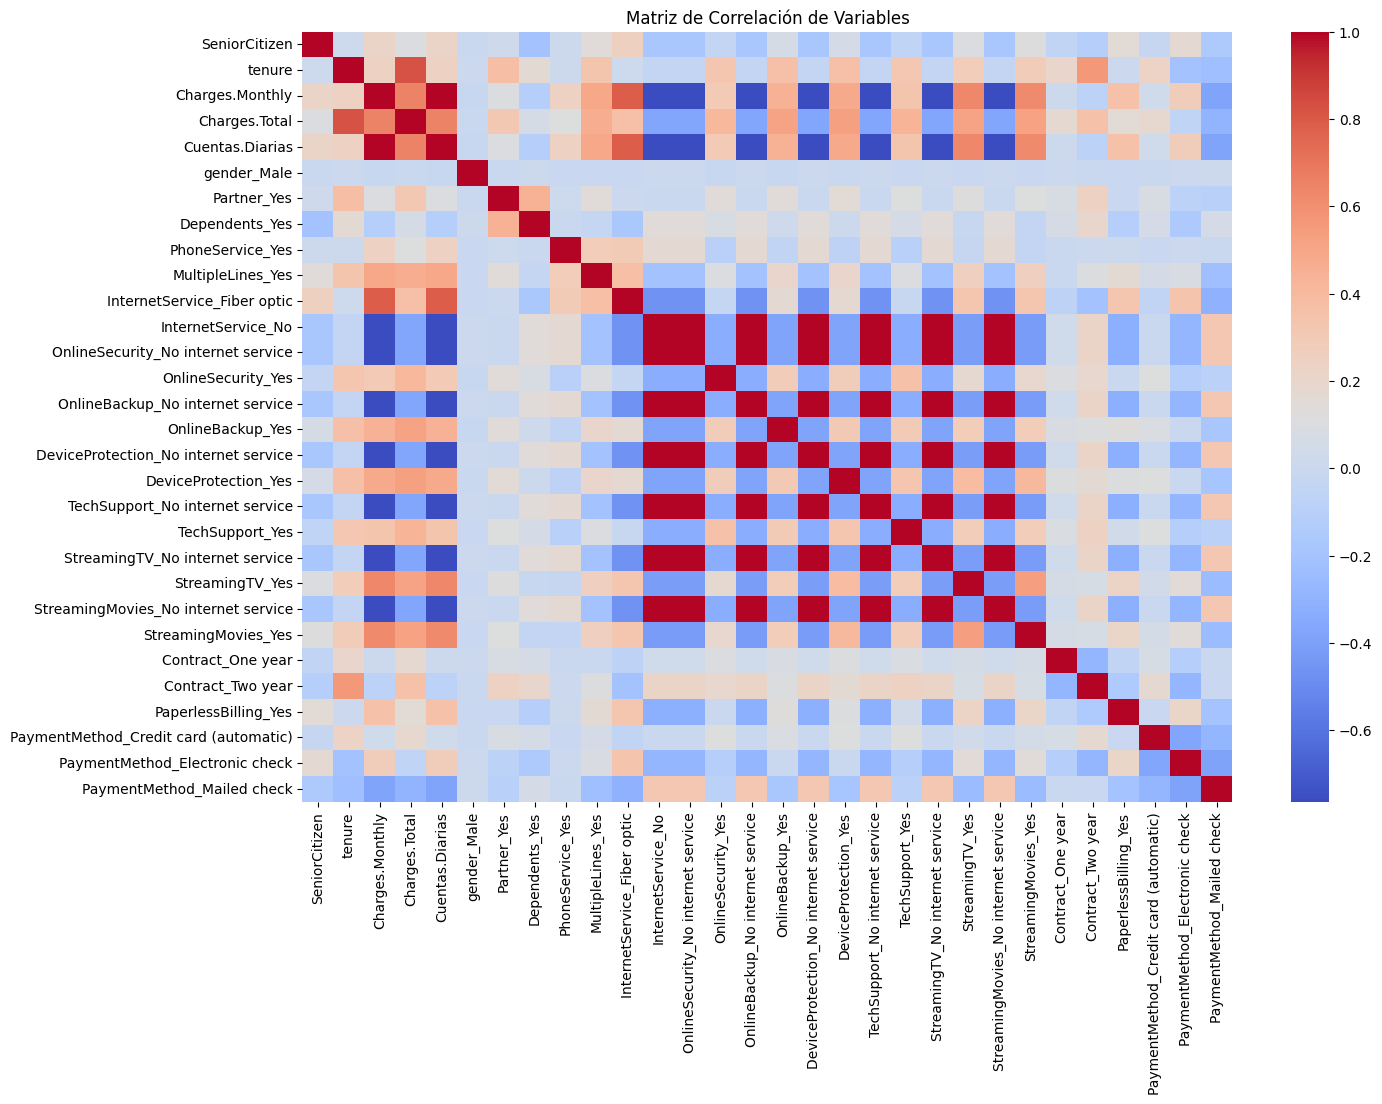


Correlación con la variable objetivo 'Churn_Yes':
Churn_Yes                                1.000000
InternetService_Fiber optic              0.300416
PaymentMethod_Electronic check           0.294181
Cuentas.Diarias                          0.189393
Charges.Monthly                          0.189393
PaperlessBilling_Yes                     0.186309
SeniorCitizen                            0.146400
StreamingTV_Yes                          0.062456
StreamingMovies_Yes                      0.060092
MultipleLines_Yes                        0.039277
PhoneService_Yes                         0.012337
gender_Male                             -0.009494
DeviceProtection_Yes                    -0.063479
OnlineBackup_Yes                        -0.080211
PaymentMethod_Mailed check              -0.089198
PaymentMethod_Credit card (automatic)   -0.131448
Partner_Yes                             -0.148106
Dependents_Yes                          -0.160347
TechSupport_Yes                         -0.160476

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlación del DataFrame codificado (incluyendo la variable objetivo Churn_Yes)
# Usamos X_cleaned que no contiene la columna 'customerID' ni valores faltantes
matriz_correlacion = X_cleaned.corr()

# Visualizamos la matriz de correlación usando un mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables')
plt.show()

# Mostramos las correlaciones con la variable objetivo 'Churn_Yes'
# Para ver la correlación con Churn_Yes, necesitamos combinar X_cleaned con y_cleaned
df_cleaned_corr = pd.concat([X_cleaned, y_cleaned], axis=1)
matriz_correlacion_con_churn = df_cleaned_corr.corr()

print("\nCorrelación con la variable objetivo 'Churn_Yes':")
print(matriz_correlacion_con_churn['Churn_Yes'].sort_values(ascending=False))

### 🏧 Análisis Dirigido
Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

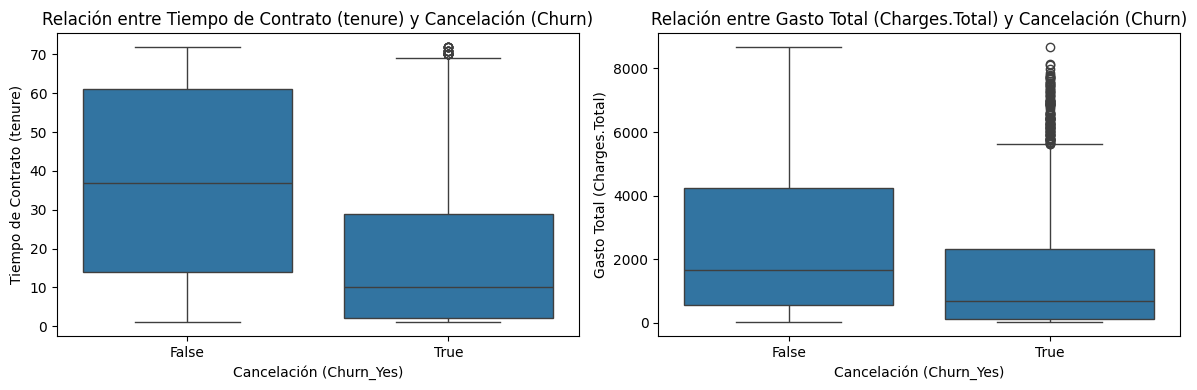

In [17]:
# Aseguramos que la columna Churn_Yes sea categórica para los gráficos
df_cleaned_corr['Churn_Yes'] = df_cleaned_corr['Churn_Yes'].astype('category')

# Creamos una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Visualizamos la relación entre 'tenure' y 'Churn_Yes' usando un boxplot en el primer subplot
sns.boxplot(x='Churn_Yes', y='tenure', data=df_cleaned_corr, ax=axes[0])
axes[0].set_title('Relación entre Tiempo de Contrato (tenure) y Cancelación (Churn)')
axes[0].set_xlabel('Cancelación (Churn_Yes)')
axes[0].set_ylabel('Tiempo de Contrato (tenure)')

# Visualizamos la relación entre 'Charges.Total' y 'Churn_Yes' usando un boxplot en el segundo subplot
sns.boxplot(x='Churn_Yes', y='Charges.Total', data=df_cleaned_corr, ax=axes[1])
axes[1].set_title('Relación entre Gasto Total (Charges.Total) y Cancelación (Churn)')
axes[1].set_xlabel('Cancelación (Churn_Yes)')
axes[1].set_ylabel('Gasto Total (Charges.Total)')

# Ajustamos el layout para evitar que los títulos se solapen
plt.tight_layout()

# Mostramos los gráficos
plt.show()

## 🤖 Modelado Predictivo

### 🔰Separación de Datos
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [20]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño de las etiquetas de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño de las etiquetas de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (8619, 30)
Tamaño del conjunto de prueba (X_test): (2155, 30)
Tamaño de las etiquetas de entrenamiento (y_train): (8619,)
Tamaño de las etiquetas de prueba (y_test): (2155,)


### ✅ Creación de Modelos
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [21]:
from sklearn.linear_model import LogisticRegression

# Inicializamos y entrenamos el modelo de Regresión Logística con los datos escalados
modelo_regresion_logistica = LogisticRegression(random_state=42)
modelo_regresion_logistica.fit(X_train_scaled, y_train)

print("Modelo de Regresión Logística entrenado.")

Modelo de Regresión Logística entrenado.


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Inicializamos y entrenamos el modelo de Árbol de Decisión con los datos originales (sin escalar)
modelo_arbol_decision = DecisionTreeClassifier(random_state=42)
modelo_arbol_decision.fit(X_train, y_train)

print("Modelo de Árbol de Decisión entrenado.")

Modelo de Árbol de Decisión entrenado.


### 👀 Evaluación de los Modelos
Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Evaluación del Modelo de Regresión Logística ---

# Realizamos predicciones en el conjunto de prueba escalado
y_pred_regresion_logistica = modelo_regresion_logistica.predict(X_test_scaled)

# Calculamos las métricas de evaluación
accuracy_rl = accuracy_score(y_test, y_pred_regresion_logistica)
precision_rl = precision_score(y_test, y_pred_regresion_logistica)
recall_rl = recall_score(y_test, y_pred_regresion_logistica)
f1_rl = f1_score(y_test, y_pred_regresion_logistica)
conf_matrix_rl = confusion_matrix(y_test, y_pred_regresion_logistica)

print("--- Métricas de Evaluación para Regresión Logística ---")
print(f"Exactitud: {accuracy_rl:.4f}")
print(f"Precisión: {precision_rl:.4f}")
print(f"Recall: {recall_rl:.4f}")
print(f"F1-score: {f1_rl:.4f}")
print("\nMatriz de Confusión:")
display(conf_matrix_rl)


# --- Evaluación del Modelo de Árbol de Decisión ---

# Realizamos predicciones en el conjunto de prueba (sin escalar)
y_pred_arbol_decision = modelo_arbol_decision.predict(X_test)

# Calculamos las métricas de evaluación
accuracy_ad = accuracy_score(y_test, y_pred_arbol_decision)
precision_ad = precision_score(y_test, y_pred_arbol_decision)
recall_ad = recall_score(y_test, y_pred_arbol_decision)
f1_ad = f1_score(y_test, y_pred_arbol_decision)
conf_matrix_ad = confusion_matrix(y_test, y_pred_arbol_decision)

print("\n--- Métricas de Evaluación para Árbol de Decisión ---")
print(f"Exactitud: {accuracy_ad:.4f}")
print(f"Precisión: {precision_ad:.4f}")
print(f"Recall: {recall_ad:.4f}")
print(f"F1-score: {f1_ad:.4f}")
print("\nMatriz de Confusión:")
display(conf_matrix_ad)

--- Métricas de Evaluación para Regresión Logística ---
Exactitud: 0.8385
Precisión: 0.8347
Recall: 0.8440
F1-score: 0.8393

Matriz de Confusión:


array([[898, 180],
       [168, 909]])


--- Métricas de Evaluación para Árbol de Decisión ---
Exactitud: 0.7986
Precisión: 0.7883
Recall: 0.8162
F1-score: 0.8020

Matriz de Confusión:


array([[842, 236],
       [198, 879]])

#### Análisis y Comparación de Modelos

Basándonos en las métricas de evaluación en el conjunto de prueba después de aplicar SMOTE:

**Regresión Logística:**

*   **Exactitud (Accuracy):** 0.8385
*   **Precisión (Precision):** 0.8347
*   **Recall:** 0.8440
*   **F1-score:** 0.8393


**Regresión Logística:**

*   Obtuvo una exactitud de 0.8385.
*   La precisión y recall son relativamente cercanas (0.8347 y 0.8440), lo que sugiere un buen equilibrio entre identificar correctamente a los clientes que cancelan (recall) y no etiquetar incorrectamente a los que no cancelan (precisión).
*   El F1-score (0.8393) es una buena métrica combinada que también indica un rendimiento sólido.
*   Como la Regresión Logística es un modelo lineal, es menos propenso al overfitting que modelos más complejos como los árboles de decisión, a menos que haya una gran cantidad de características o interacciones complejas no capturadas.

**Árbol de Decisión:**

*   Obtuvo una exactitud ligeramente menor de 0.7986.
*   Las métricas de precisión (0.7883) y recall (0.8162) también son un poco más bajas que las de la Regresión Logística, aunque el recall es un poco más alto que la precisión.
*   El F1-score (0.8020) es menor que el de la Regresión Logística.
*   Los Árboles de Decisión, especialmente sin restricciones de profundidad, son más propensos al overfitting, ya que pueden aprender reglas muy específicas del conjunto de entrenamiento que no se generalizan bien a datos nuevos. Si el rendimiento en el conjunto de entrenamiento fuera significativamente mayor que en el conjunto de prueba, esto sería una clara señal de overfitting.

**Conclusión preliminar basada en el conjunto de prueba:**

Basándonos solo en el rendimiento en el conjunto de prueba, el modelo de **Regresión Logística** parece tener un mejor desempeño general en este caso, con métricas ligeramente superiores en exactitud, precisión y F1-score, y un recall comparable.

Para confirmar si hay overfitting en el Árbol de Decisión, necesitaríamos evaluar su rendimiento en el conjunto de entrenamiento. Si la exactitud en entrenamiento es mucho mayor que 0.7986, indicaría overfitting. Si ambos modelos tuvieran un rendimiento significativamente bajo tanto en entrenamiento como en prueba, podríamos considerar underfitting.

Dado que la Regresión Logística tuvo un rendimiento razonable en el conjunto de prueba, no parece haber un underfitting severo en ese modelo. La diferencia de rendimiento entre los dos modelos en el conjunto de prueba podría sugerir que el Árbol de Decisión podría estar sufriendo un poco de overfitting, o simplemente que la Regresión Logística es un modelo más adecuado para este conjunto de datos después del preprocesamiento realizado.


In [24]:
# --- Evaluación del Modelo de Regresión Logística en el conjunto de Entrenamiento ---

# Realizamos predicciones en el conjunto de entrenamiento escalado
y_pred_train_regresion_logistica = modelo_regresion_logistica.predict(X_train_scaled)

# Calculamos las métricas de evaluación en entrenamiento
accuracy_train_rl = accuracy_score(y_train, y_pred_train_regresion_logistica)
precision_train_rl = precision_score(y_train, y_pred_train_regresion_logistica)
recall_train_rl = recall_score(y_train, y_pred_train_regresion_logistica)
f1_train_rl = f1_score(y_train, y_pred_train_regresion_logistica)
conf_matrix_train_rl = confusion_matrix(y_train, y_pred_train_regresion_logistica)

print("--- Métricas de Evaluación para Regresión Logística en Entrenamiento ---")
print(f"Exactitud: {accuracy_train_rl:.4f}")
print(f"Precisión: {precision_train_rl:.4f}")
print(f"Recall: {recall_train_rl:.4f}")
print(f"F1-score: {f1_train_rl:.4f}")
print("\nMatriz de Confusión en Entrenamiento:")
display(conf_matrix_train_rl)

# --- Evaluación del Modelo de Árbol de Decisión en el conjunto de Entrenamiento ---

# Realizamos predicciones en el conjunto de entrenamiento (sin escalar)
y_pred_train_arbol_decision = modelo_arbol_decision.predict(X_train)

# Calculamos las métricas de evaluación en entrenamiento
accuracy_train_ad = accuracy_score(y_train, y_pred_train_arbol_decision)
precision_train_ad = precision_score(y_train, y_pred_train_arbol_decision)
recall_train_ad = recall_score(y_train, y_pred_train_arbol_decision)
f1_train_ad = f1_score(y_train, y_pred_train_arbol_decision)
conf_matrix_train_ad = confusion_matrix(y_train, y_pred_train_arbol_decision)

print("\n--- Métricas de Evaluación para Árbol de Decisión en Entrenamiento ---")
print(f"Exactitud: {accuracy_train_ad:.4f}")
print(f"Precisión: {precision_train_ad:.4f}")
print(f"Recall: {recall_train_ad:.4f}")
print(f"F1-score: {f1_train_ad:.4f}")
print("\nMatriz de Confusión en Entrenamiento:")
display(conf_matrix_train_ad)

--- Métricas de Evaluación para Regresión Logística en Entrenamiento ---
Exactitud: 0.8291
Precisión: 0.8281
Recall: 0.8306
F1-score: 0.8294

Matriz de Confusión en Entrenamiento:


array([[3566,  743],
       [ 730, 3580]])


--- Métricas de Evaluación para Árbol de Decisión en Entrenamiento ---
Exactitud: 0.9941
Precisión: 0.9995
Recall: 0.9886
F1-score: 0.9941

Matriz de Confusión en Entrenamiento:


array([[4307,    2],
       [  49, 4261]])

Un resumen y análisis de los resultados de entrenamiento y prueba:

Regresión Logística:

Las métricas de rendimiento para la Regresión Logística son muy similares tanto en el conjunto de entrenamiento como en el de prueba. Esto sugiere que el modelo de Regresión Logística no presenta overfitting ni underfitting significativo. Generaliza bien a datos nuevos.

Árbol de Decisión:

Observamos una diferencia significativa en el rendimiento del Árbol de Decisión entre el conjunto de entrenamiento y el conjunto de prueba. La exactitud, precisión, recall y F1-score son mucho más altas en el entrenamiento que en la prueba. Esto es un claro indicio de overfitting. El modelo de Árbol de Decisión ha aprendido demasiado los detalles específicos del conjunto de entrenamiento y no generaliza bien a datos no vistos.

Conclusión:

Basándonos en esta evaluación, el modelo de Regresión Logística es el que mejor se desempeña en este caso, ya que muestra un rendimiento consistente y bueno tanto en entrenamiento como en prueba, sin signos de overfitting. El modelo de Árbol de Decisión, aunque tiene un rendimiento casi perfecto en el entrenamiento, sufre de overfitting y no es tan efectivo en la predicción con datos nuevos.

## 📋 Interpretación y Conclusiones

### ⛓ Análisis de la Importancia de las Variables

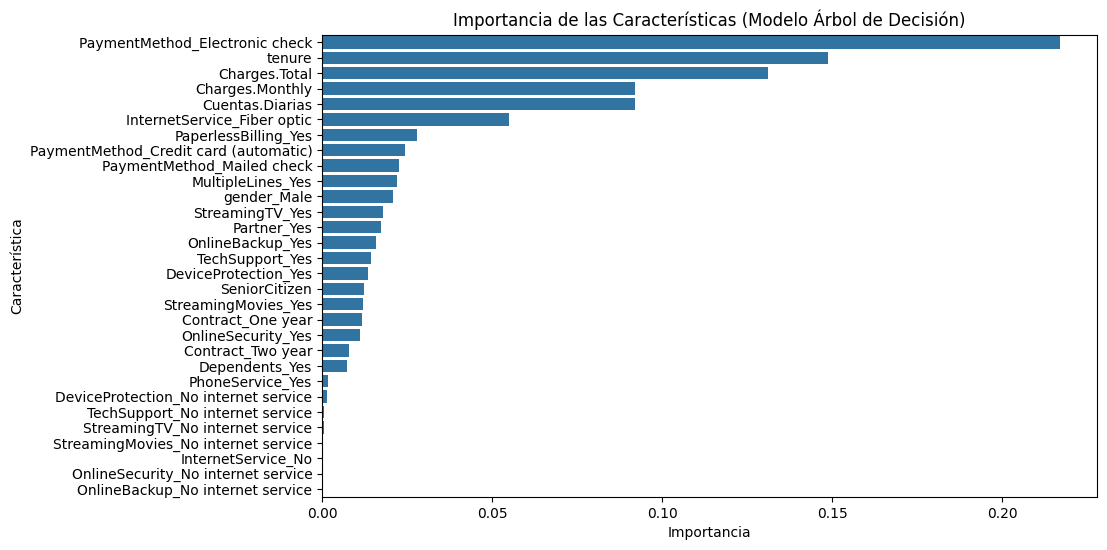


Importancia de las Características:


,Caracteristica,Importancia
28,PaymentMethod_Electronic check,0.216984
1,tenure,0.148622
3,Charges.Total,0.131189
2,Charges.Monthly,0.092132
4,Cuentas.Diarias,0.091863
10,InternetService_Fiber optic,0.055035
26,PaperlessBilling_Yes,0.027893
27,PaymentMethod_Credit card (automatic),0.024312
29,PaymentMethod_Mailed check,0.022524
9,MultipleLines_Yes,0.021977


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtenemos la importancia de las características del modelo de Árbol de Decisión
importancias = modelo_arbol_decision.feature_importances_

# Creamos un DataFrame para visualizar las importancias
df_importancias = pd.DataFrame({'Caracteristica': X_train.columns, 'Importancia': importancias})

# Ordenamos las características por importancia de forma descendente
df_importancias = df_importancias.sort_values('Importancia', ascending=False)

# Visualizamos la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Caracteristica', data=df_importancias)
plt.title('Importancia de las Características (Modelo Árbol de Decisión)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# Mostramos el DataFrame con las importancias
print("\nImportancia de las Características:")
display(df_importancias)

## Conclusión

Basándonos en el análisis de los datos, el preprocesamiento, el balanceo de clases, el entrenamiento de modelos y la evaluación, podemos extraer las siguientes conclusiones clave:

1.  **Desbalance de Clases:** Identificamos un desbalance significativo en el conjunto de datos original, con una proporción mucho menor de clientes que cancelaron (Churn). La aplicación de SMOTE fue crucial para abordar este desbalance y entrenar modelos que pudieran predecir ambas clases de manera más efectiva.
2.  **Variables Clave (basado en el Árbol de Decisión):** El análisis de importancia de características del modelo de Árbol de Decisión resaltó varias variables como las más influyentes en la predicción de la cancelación. Las variables principales incluyeron:
    *   **Método de Pago (Electronic Check):** Ser un cliente que paga con cheque electrónico parece tener una alta importancia en la predicción de cancelación.
    *   **Tiempo de Contrato (Tenure):** Los clientes con menor tiempo de contrato tienden a ser más propensos a cancelar, lo cual es consistente con la correlación negativa observada y los boxplots.
    *   **Cargos Totales (Charges.Total) y Cargos Mensuales (Charges.Monthly):** Estas variables relacionadas con el gasto también mostraron una importancia considerable, aunque con correlaciones más moderadas.
    *   **Tipo de Servicio de Internet (Fiber optic):** Tener servicio de fibra óptica también parece ser un factor importante.
3.  **Rendimiento del Modelo:**
    *   El modelo de **Regresión Logística** mostró un rendimiento sólido y consistente tanto en el conjunto de entrenamiento como en el de prueba después de aplicar SMOTE. No mostró signos evidentes de overfitting y tuvo métricas de evaluación (Exactitud, Precisión, Recall, F1-score) ligeramente superiores en el conjunto de prueba en comparación con el Árbol de Decisión no optimizado.
    *   El modelo de **Árbol de Decisión** sin restricciones de complejidad presentó un claro **overfitting**, con un rendimiento casi perfecto en el conjunto de entrenamiento pero una caída significativa en el rendimiento en el conjunto de prueba. Esto subraya la importancia de controlar la complejidad de los modelos basados en árboles para asegurar una buena generalización.
4.  **Implicaciones:** Los hallazgos sugieren que factores como el método de pago, el tiempo que el cliente lleva con la empresa y el tipo de servicio de internet son predictores importantes de la cancelación. La empresa podría enfocarse en estrategias de retención dirigidas a clientes con estas características, como ofrecer alternativas de pago, programas de fidelización para nuevos clientes o mejorar la calidad del servicio de fibra óptica.

En resumen, la Regresión Logística demostró ser un modelo más robusto y generalizable en este caso particular después del preprocesamiento y balanceo de datos. El análisis de importancia de variables proporciona información valiosa para comprender los impulsores de la cancelación, lo cual puede guiar la toma de decisiones estratégicas.


### Estrategías de retención
1. **Clientes con Pago por Cheque Electrónico:**
  * **Ofrecer alternativas de pago:** Incentivar a los clientes que pagan con cheque electrónico a cambiar a otros métodos de pago más estables (como domiciliación bancaria o tarjeta de crédito) ofreciendo descuentos, bonificaciones o beneficios adicionales.
  * **Mejorar la experiencia del cheque electrónico:** Si cambiar de método de pago no es viable para algunos clientes, investigar las razones detrás de la insatisfacción con el cheque electrónico y buscar formas de mejorar el proceso o la comunicación relacionada con este método.
2. **Clientes con Poco Tiempo de Contrato (Bajo Tenure):**
 * **Programas de bienvenida y fidelización temprana:** Implementar programas específicos para los nuevos clientes durante sus primeros meses para asegurar que tengan una buena experiencia, resolver problemas rápidamente y mostrarles el valor de permanecer con la empresa.
  * **Comunicación proactiva:** Contactar a los clientes con bajo tenure para verificar su satisfacción, ofrecer soporte adicional y presentarles los beneficios a largo plazo de sus servicios.
  * **Ofertas de renovación temprana:** Para clientes que se acercan al final de sus primeros meses de contrato, ofrecer incentivos atractivos para renovar por períodos más largos.
3. **Clientes con Servicio de Fibra Óptica:**
  * **Monitorear la calidad del servicio:** Asegurarse de que los clientes con fibra óptica experimenten un servicio de alta calidad y confiable, ya que problemas técnicos o de rendimiento podrían ser un factor de cancelación.
  * **Soporte técnico especializado:** Ofrecer un soporte técnico eficiente y especializado para los problemas relacionados con la fibra óptica.
  * **Comunicación sobre valor agregado:** Destacar los beneficios y el valor del servicio de fibra óptica más allá de la velocidad (por ejemplo, estabilidad, capacidad para múltiples dispositivos, servicios adicionales).
4. **Análisis Combinado:**
  * Identificar segmentos de clientes que combinen varias de estas características de riesgo (por ejemplo, clientes nuevos con fibra óptica y pago por cheque electrónico) para dirigir estrategias de retención más personalizadas e intensivas.